# Titanic Kaggle Competition Machine Learning from Disaster
## Derek Castleman

In this Jupyter notebook I will present the machine learning models that I developed for the Titanic competition on Kaggle in which I try to predict the possibility of someone surviving based on features such as: gender, class, number of family members, fare paid and where they had embarked.

In [1]:
# Importing numpy and pandas for use in the notebook.
import numpy as np
import pandas as pd

In [2]:
# Reading in the training data 
titanic_data = df = pd.read_csv ('train.csv')

I am going to take a look at the data that was loaded and then describe it to see which columns have null values within them.

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.describe(include='all')  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coleridge, Mr. Reginald Charles",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Looking at the description you can see that there is missing data for the ages with only 714 out of 891 and for the cabin. However, the cabin should not really matter in the model because it will not really have a bearing on survivorship, and there is so much missing it can be a little bit of a useless metric. 

I want to make a histogram for the age data to understand the pattern of it.

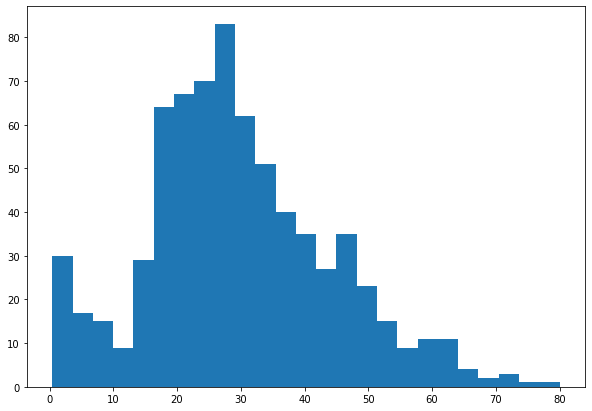

In [5]:
from matplotlib import pyplot as plt

age = titanic_data['Age']

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(age, bins = 25)
 
# Show plot
plt.show()

I think the data is slightly skewed so I want to check the median value for it.

In [6]:
titanic_data['Age'].median()

28.0

Replace the null values in the age bracket with the median value.

In [7]:
titanic_data["Age"].fillna(28.0, inplace = True)

In [8]:
titanic_data.describe(include='all') #Checking to see there are 891 values now.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coleridge, Mr. Reginald Charles",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Fixing gender

I need to one hot encode the gender so that they are numbers that can be used in a machine learning model.

In [9]:
# Get the gender column first
gender = titanic_data['Sex'].to_numpy() #Changing to a numpy array
gender = gender.reshape(-1, 1) #Reshaping it for OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(drop = 'first', sparse = False) #Dropping the first column since it is redundant

titanic_gender = onehotencoder.fit_transform(gender)

In [11]:
titanic_gender #Checking to make sure that it workded

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [12]:
gender_df = pd.DataFrame(titanic_gender, columns = ['Gender']) #Changing array back into dataframe

In [13]:
gender_df

,Gender
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [14]:
titanic_data_gender = titanic_data.join(gender_df) #Joining the encoded gender back to the original dataframe
titanic_data_gender

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


## Feature Engineering

Going to create several features from the original data. Rather than having siblings and parents apart from each other I will combine them simply into one feature called family. 

I will create an ageclass feature dividing the age by the class that the passenger was in. I divide by class since first class has the best chance of surviving and it decreases with class.

I will also create a fareage feature dividing the fare by the age of the passenger. The higher your fare was the more likely you are were going to survive but chance should go down with age.

And finally a faregender feature with since the higher the fare the more likely you would survive and males had less of a chance of survival and since they are encoded as a one this will create a fraction that reflects this (I had to add one to gender since females were encoded at a zero which would not be allowed in division).

In [15]:
titanic_data_gender['AgeClass'] = titanic_data_gender['Age'] / titanic_data_gender['Pclass'] 
titanic_data_gender['Family'] = titanic_data_gender['SibSp'] + titanic_data_gender['Parch']
titanic_data_gender['FareAge'] = titanic_data_gender['Fare'] / titanic_data_gender['Age']
titanic_data_gender['FareGender'] = titanic_data_gender['Fare'] / (titanic_data_gender['Gender'] + 1)
titanic_data_gender

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.333333,1,0.329545,3.6250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,38.000000,1,1.875876,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,8.666667,0,0.304808,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,35.000000,1,1.517143,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,11.666667,0,0.230000,4.0250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,13.500000,0,0.481481,6.5000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0,19.000000,0,1.578947,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.0,9.333333,3,0.837500,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,26.000000,0,1.153846,15.0000


In [16]:
titanic_data_gender.info() #Checking for how many nulls that the embarked data has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Gender       891 non-null    float64
 13  AgeClass     891 non-null    float64
 14  Family       891 non-null    int64  
 15  FareAge      891 non-null    float64
 16  FareGender   891 non-null    float64
dtypes: float64(6), int64(6), object(5)
memory usage: 118.5+ KB


In [17]:
embarked_mode = titanic_data_gender['Embarked'].mode() #Looking for the mode of embarked since it is not a number
embarked_mode

0    S
dtype: object

In [18]:
titanic_data_gender["Embarked"].fillna('S', inplace = True) #Replacing two nulls of embarked with S

In [19]:
titanic_data_gender.info() #Making sure there are no more nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gender       891 non-null    float64
 13  AgeClass     891 non-null    float64
 14  Family       891 non-null    int64  
 15  FareAge      891 non-null    float64
 16  FareGender   891 non-null    float64
dtypes: float64(6), int64(6), object(5)
memory usage: 118.5+ KB


I will ordinal encode the embarked feature because I do not want to have multiple columns for this. I will set the categories with Q being the lowest and S being the highest since more people survived from S and the least amount from Q.

In [20]:
embarked = titanic_data_gender['Embarked'].to_numpy()
embarked = embarked.reshape(-1, 1)

embarked_categories = ['Q', 'C', 'S'] #Selecting the order for the categories for ordinalencoder
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder(categories=[embarked_categories])

titanic_embarked = ordinalencoder.fit_transform(embarked)

In [21]:
titanic_embarked

array([[2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],

In [22]:
ordinalencoder.categories_ #Checking the order of the categories

[array(['Q', 'C', 'S'], dtype=object)]

In [23]:
embarked_df = pd.DataFrame(titanic_embarked, columns = ['embarked'])
embarked_df

,embarked
0,2.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
886,2.0
887,2.0
888,2.0
889,1.0


In [24]:
titanic_data_embarked = titanic_data_gender.join(embarked_df)
titanic_data_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.333333,1,0.329545,3.6250,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,38.000000,1,1.875876,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,8.666667,0,0.304808,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,35.000000,1,1.517143,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,11.666667,0,0.230000,4.0250,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,13.500000,0,0.481481,6.5000,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0,19.000000,0,1.578947,30.0000,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.0,9.333333,3,0.837500,23.4500,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,26.000000,0,1.153846,15.0000,1.0


Creating an embarked_class feature in which the embarked destination is the numerator (one added to it since it starts at zero) to reflect the likelier to survive based on where the passenger departed and divided class because this had a bearing on survivorship as well.

In [25]:
titanic_data_embarked['Embarked_Class'] = (titanic_data_embarked['embarked'] + 1) / titanic_data_embarked['Pclass']
titanic_data_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender,embarked,Embarked_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.333333,1,0.329545,3.6250,2.0,1.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,38.000000,1,1.875876,71.2833,1.0,2.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,8.666667,0,0.304808,7.9250,2.0,1.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,35.000000,1,1.517143,53.1000,2.0,3.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,11.666667,0,0.230000,4.0250,2.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,13.500000,0,0.481481,6.5000,2.0,1.500000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0,19.000000,0,1.578947,30.0000,2.0,3.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.0,9.333333,3,0.837500,23.4500,2.0,1.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,26.000000,0,1.153846,15.0000,1.0,2.000000


For the final dataframe for the training data, I will be dropping columns that should have no bearing at all on surviving, such as: PassengerId, Name and Ticket number. I will also drop sex, embarked, sibsp and parch since these feature were either modified during encoding or used in feature engineering. 

In [26]:
titanic_final = titanic_data_embarked.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 
                                               'SibSp', 'Parch', 'embarked'], axis=1)

titanic_final

,Survived,Pclass,Age,Fare,Gender,AgeClass,Family,FareAge,FareGender,Embarked_Class
0,0,3,22.0,7.2500,1.0,7.333333,1,0.329545,3.6250,1.000000
1,1,1,38.0,71.2833,0.0,38.000000,1,1.875876,71.2833,2.000000
2,1,3,26.0,7.9250,0.0,8.666667,0,0.304808,7.9250,1.000000
3,1,1,35.0,53.1000,0.0,35.000000,1,1.517143,53.1000,3.000000
4,0,3,35.0,8.0500,1.0,11.666667,0,0.230000,4.0250,1.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1.0,13.500000,0,0.481481,6.5000,1.500000
887,1,1,19.0,30.0000,0.0,19.000000,0,1.578947,30.0000,3.000000
888,0,3,28.0,23.4500,0.0,9.333333,3,0.837500,23.4500,1.000000
889,1,1,26.0,30.0000,1.0,26.000000,0,1.153846,15.0000,2.000000


# Machine Learning Models

### Scoring

For my models I will be using accuracy as a scoring measure. Since this problem is trying to classify each passenger on whether they would survive or not, accuracy is the best metric to use since it is just looking at whether the prediction was right or wrong

In [27]:
from sklearn.model_selection import cross_val_score
def display_scores(model, X_train, y_train):
    model_scores = cross_val_score(model, X_train, y_train,
                         scoring="accuracy", cv=5)
    scores = (model_scores)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Data Preparation

I need to prepare the training data for use in models by first selecting the features (X_train) and labels (y_train) and then I need to scale the data since these machine learning models require that.

In [28]:
titanic_final

,Survived,Pclass,Age,Fare,Gender,AgeClass,Family,FareAge,FareGender,Embarked_Class
0,0,3,22.0,7.2500,1.0,7.333333,1,0.329545,3.6250,1.000000
1,1,1,38.0,71.2833,0.0,38.000000,1,1.875876,71.2833,2.000000
2,1,3,26.0,7.9250,0.0,8.666667,0,0.304808,7.9250,1.000000
3,1,1,35.0,53.1000,0.0,35.000000,1,1.517143,53.1000,3.000000
4,0,3,35.0,8.0500,1.0,11.666667,0,0.230000,4.0250,1.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1.0,13.500000,0,0.481481,6.5000,1.500000
887,1,1,19.0,30.0000,0.0,19.000000,0,1.578947,30.0000,3.000000
888,0,3,28.0,23.4500,0.0,9.333333,3,0.837500,23.4500,1.000000
889,1,1,26.0,30.0000,1.0,26.000000,0,1.153846,15.0000,2.000000


First I need to separate the labels (survived) from  the features.

In [29]:
y_train = titanic_final['Survived'] #Selecting labels
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
X_train = titanic_final.drop(['Survived'], axis = 1) #Dropping labels to leave features
X_train

,Pclass,Age,Fare,Gender,AgeClass,Family,FareAge,FareGender,Embarked_Class
0,3,22.0,7.2500,1.0,7.333333,1,0.329545,3.6250,1.000000
1,1,38.0,71.2833,0.0,38.000000,1,1.875876,71.2833,2.000000
2,3,26.0,7.9250,0.0,8.666667,0,0.304808,7.9250,1.000000
3,1,35.0,53.1000,0.0,35.000000,1,1.517143,53.1000,3.000000
4,3,35.0,8.0500,1.0,11.666667,0,0.230000,4.0250,1.000000
...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,1.0,13.500000,0,0.481481,6.5000,1.500000
887,1,19.0,30.0000,0.0,19.000000,0,1.578947,30.0000,3.000000
888,3,28.0,23.4500,0.0,9.333333,3,0.837500,23.4500,1.000000
889,1,26.0,30.0000,1.0,26.000000,0,1.153846,15.0000,2.000000


I need to scale the data for running the each of the machine learning models.

In [31]:
from sklearn.preprocessing import StandardScaler

model_scaler = StandardScaler() #Scaling the data using a StandardScaler
X_train = model_scaler.fit_transform(X_train)

## Machine Learning Models

I will now try a logistic regression then the classification models: Random Forest, Gradient Boosting, K Neighobrs, Support Vector and a Decision Tree. I will first run these in the default mode to see how they each perform on the data using the scoring function created above.

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [33]:
display_scores(model, X_train, y_train)

Scores: [0.79888268 0.80337079 0.79775281 0.7752809  0.8258427 ]
Mean: 0.8002259745150964
Standard deviation: 0.01610145382684929


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
display_scores(model, X_train, y_train)

Scores: [0.78212291 0.80337079 0.85393258 0.79213483 0.84831461]
Mean: 0.8159751428033394
Standard deviation: 0.029529011277712028


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
display_scores(model, X_train, y_train)

Scores: [0.79329609 0.79775281 0.86516854 0.80337079 0.83707865]
Mean: 0.8193333751804659
Standard deviation: 0.02761963951987102


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
display_scores(model, X_train, y_train)

Scores: [0.81005587 0.79213483 0.84269663 0.8258427  0.83146067]
Mean: 0.8204381394764925
Standard deviation: 0.017635275574719153


In [37]:
from sklearn.svm import SVC
model = SVC()
display_scores(model, X_train, y_train)

Scores: [0.82681564 0.81460674 0.81460674 0.80337079 0.85393258]
Mean: 0.822666499278137
Standard deviation: 0.017303337130860318


In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
display_scores(model, X_train, y_train)

Scores: [0.72067039 0.75842697 0.80337079 0.75842697 0.80898876]
Mean: 0.769976774841504
Standard deviation: 0.03266499947620573


## Hyperparameter Tuning

I will now tune the hyperparameters for all of the models to improve their performance on the data. I will use a randomized seach for the Random Forest and Gradient Boosting since these can have a wide range of hyperparamters that can be used and then I will follow these with a Grid Search afterwards. For the rest of the models I will just do a Grid Search to find the best hyperparameters for use.

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [40]:
y_train = titanic_final['Survived']
X_train = titanic_final.drop(['Survived'], axis = 1)
model_scaler = StandardScaler()
X_train = model_scaler.fit_transform(X_train)

In [41]:
# Creating a range of parameters to feed to the RandomizedSearch for the different hyperparameters.
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 110, num = 40)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1, scoring = "accuracy")# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 20.1min finished


{'n_estimators': 1960,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 29,
 'bootstrap': False}

In [43]:
rfr_optimal_model = RandomForestClassifier(**rf_random.best_params_, random_state = 42)
rfr_optimal_model.fit(X_train, y_train)
display_scores(rfr_optimal_model, X_train, y_train)

Scores: [0.77653631 0.80337079 0.88764045 0.80898876 0.85955056]
Mean: 0.827217374929383
Standard deviation: 0.04041260940210447


In [46]:
n_estimators = [1800, 1900, 1950, 2000, 2100]
max_features = ['auto', 'sqrt']
max_depth = [20, 25, 30, 35, 40]
min_samples_split = [10, 13, 15, 17, 20]
min_samples_leaf = [2, 3, 4, 5, 6]
bootstrap = [False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
rf = RandomForestClassifier()
# Grid search of parameters, using 3 fold cross validation, 
rf_grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1,
                         scoring = "accuracy")# Fit the random search model
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed: 50.2min finished


{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 17,
 'n_estimators': 2000}

In [48]:
rfr_optimal_model = RandomForestClassifier(**rf_grid.best_params_, random_state = 42)
rfr_optimal_model.fit(X_train, y_train)
display_scores(rfr_optimal_model, X_train, y_train)

Scores: [0.77653631 0.80337079 0.88764045 0.81460674 0.85393258]
Mean: 0.827217374929383
Standard deviation: 0.039143091981439955


In [49]:
rfr_optimal_model.feature_importances_

array([0.06398675, 0.06900615, 0.08413357, 0.30507766, 0.07016586,
       0.05387684, 0.12027881, 0.18180616, 0.05166819])

In [50]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 110, num = 40)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 10]
learning_rate = [0.01, 0.05, 0.1, 0.25, 0.40, 0.50, 0.75, 1.0]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [51]:
gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1, scoring = "accuracy")
gb_random.fit(X_train, y_train)
gb_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 45.9min finished


{'n_estimators': 248,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 2,
 'learning_rate': 0.05}

In [52]:
gbr_random_model = GradientBoostingClassifier(**gb_random.best_params_, random_state = 42)
gbr_random_model.fit(X_train, y_train)
display_scores(gbr_random_model, X_train, y_train)

Scores: [0.81564246 0.83707865 0.8258427  0.78651685 0.84269663]
Mean: 0.8215554579122466
Standard deviation: 0.019844225459008342


In [53]:
gbr_random_model.feature_importances_

array([0.12183472, 0.06336216, 0.03216646, 0.51932121, 0.02663909,
       0.07431341, 0.08765751, 0.03800478, 0.03670066])

In [54]:
n_estimators = [200, 225, 250, 275, 300]
max_features = ['auto', 'sqrt']
max_depth = [2, 4, 6, 8]
min_samples_split = [9 ,10, 11, 12]
min_samples_leaf = [5, 6, 7, 8]
learning_rate = [0.03, 0.04, 0.05, 0.06, .07]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [55]:
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1,
                         scoring = "accuracy")
gb_grid.fit(X_train, y_train)
gb_grid.best_params_

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'learning_rate': 0.06,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'n_estimators': 250}

In [56]:
gbr_grid_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state = 42)
gbr_grid_model.fit(X_train, y_train)
display_scores(gbr_random_model, X_train, y_train)

Scores: [0.81564246 0.83707865 0.8258427  0.78651685 0.84269663]
Mean: 0.8215554579122466
Standard deviation: 0.019844225459008342


In [57]:
kernel = ['linear', 'poly', 'rbf']
C = [float(x) for x in np.linspace(0.01, 1, num = 500)]
gamma = ['scale', 'auto']
random_grid = {'kernel': kernel,
               'C': C,
               'gamma': gamma}

In [60]:
svc = SVC()
svc_random = GridSearchCV(estimator = svc, param_grid = random_grid, cv = 3, verbose=2,
                          n_jobs = -1, scoring = "accuracy")
svc_random.fit(X_train, y_train)
svc_random.best_params_

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 8848 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:   24.6s finished


{'C': 0.6726452905811623, 'gamma': 'scale', 'kernel': 'rbf'}

In [61]:
svc_random_model = SVC(**svc_random.best_params_, random_state = 42)
svc_random_model.fit(X_train, y_train)
display_scores(svc_random_model, X_train, y_train)

Scores: [0.82681564 0.8258427  0.80898876 0.80337079 0.85393258]
Mean: 0.8237900947837549
Standard deviation: 0.017651993242759862


In [62]:
n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 100, num = 50)]
weights = ['uniform', 'distance']
leaf_size = [int(x) for x in np.linspace(2, 110, num = 50)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'leaf_size': leaf_size,
               'algorithm': algorithm}

In [63]:
knc = KNeighborsClassifier()
knc_random = GridSearchCV(estimator = knc, param_grid = random_grid, cv = 3, verbose=2,
                          n_jobs = -1, scoring = "accuracy")
knc_random.fit(X_train, y_train)
knc_random.best_params_

Fitting 3 folds for each of 20000 candidates, totalling 60000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 15480 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 20336 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 25848 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 32000 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 38808 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 46256 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 54360 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 60000 out of 60000 | elapsed:  2.8min finished


{'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 18, 'weights': 'uniform'}

In [64]:
knc_random_model = KNeighborsClassifier(**knc_random.best_params_)
knc_random_model.fit(X_train, y_train)
display_scores(knc_random_model, X_train, y_train)

Scores: [0.80446927 0.81460674 0.79213483 0.78089888 0.84269663]
Mean: 0.8069612704789405
Standard deviation: 0.02116955747635274


In [65]:
penalty = ['l1', 'l2', 'elasticnet']
C = [int(x) for x in np.linspace(0.01, 1, num = 40)]
class_weight = ['balanced', 'none']
multi_class = ['auto', 'ovr', 'multinomial']
max_iter = [int(x) for x in np.linspace(100, 10000, num = 40)]
random_grid = {'penalty': penalty,
               'C': C,
               'class_weight': class_weight,
               'multi_class': multi_class,
               'max_iter': max_iter}

In [66]:
lr = LogisticRegression()
lr_random = GridSearchCV(estimator = lr, param_grid = random_grid, cv = 3, verbose=2,
                         n_jobs = -1, scoring = "accuracy")
lr_random.fit(X_train, y_train)
lr_random.best_params_

Fitting 3 folds for each of 28800 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 32368 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 68592 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:   33.1s finished


{'C': 1,
 'class_weight': 'none',
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2'}

In [67]:
lr_random_model = LogisticRegression(**lr_random.best_params_)
lr_random_model.fit(X_train, y_train)
display_scores(lr_random_model, X_train, y_train)

Scores: [0.79888268 0.80337079 0.79775281 0.7752809  0.8258427 ]
Mean: 0.8002259745150964
Standard deviation: 0.01610145382684929


In [68]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(2, 110, num = 40)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 10, 12]
max_features = ['sqrt', 'auto']
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter': splitter}

In [69]:
dtc = DecisionTreeClassifier()
dtc_random = GridSearchCV(estimator = dtc, param_grid = random_grid, cv = 3, verbose=2,
                          n_jobs = -1, scoring = "accuracy")
dtc_random.fit(X_train, y_train)
dtc_random.best_params_

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 4208 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 17200 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 28508 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:   13.1s finished


{'criterion': 'entropy',
 'max_depth': 104,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [70]:
dtc_random_model = DecisionTreeClassifier(**dtc_random.best_params_)
dtc_random_model.fit(X_train, y_train)
display_scores(dtc_random_model, X_train, y_train)

Scores: [0.79329609 0.78089888 0.8258427  0.79213483 0.80898876]
Mean: 0.8002322515849603
Standard deviation: 0.015620687311523634


## Voting Ensemble

For the final model that I will use, I will create a voting ensemble that takes all of the models from the previous section, along with their hyperparameters that were found and use them all together then see how they perform using the scoring function.

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
rfr_voting = RandomForestClassifier(**rf_grid.best_params_)
gbr_voting = GradientBoostingClassifier(**gb_grid.best_params_)
svc_voting = SVC(**svc_random.best_params_)
lr_voting = LogisticRegression(**lr_random.best_params_)
dtc_voting = DecisionTreeClassifier(**dtc_random.best_params_)
knn_voting = KNeighborsClassifier(**knc_random.best_params_)

In [101]:
voting_ensemble = VotingClassifier(estimators = [('rfr', rfr_voting), ('gbr', gbr_voting), ('svc', svc_voting), 
                                                ('lr', lr_voting), ('dtc', dtc_voting), ('knn', knn_voting)])
voting_ensemble.fit(X_train, y_train)
display_scores(voting_ensemble, X_train, y_train)

Scores: [0.82681564 0.83146067 0.84269663 0.80337079 0.84831461]
Mean: 0.8305316678174629
Standard deviation: 0.015598747211375349


# Testing Data

Now I will prepare the testing data in the same manner that was used in the first part so that the features will all be treated in the same way and have the same feature engineering. You can refer to the first part to see why I do all what I am doing with the testing data.

In [102]:
titanic_test = df = pd.read_csv ('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [103]:
titanic_test["Age"].fillna(28.0, inplace = True)

In [104]:
titanic_data['Fare'].median()

14.4542

In [105]:
titanic_test["Fare"].fillna(14.4542, inplace = True)

In [106]:
gender = titanic_test['Sex'].to_numpy()
gender = gender.reshape(-1, 1)

In [107]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(drop = 'first', sparse = False) #Dropping the first column since it is redundant

titanic_gender = onehotencoder.fit_transform(gender)

In [108]:
titanic_gender

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [109]:
gender_df = pd.DataFrame(titanic_gender, columns = ['Gender'])

In [110]:
gender_df

,Gender
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
413,1.0
414,0.0
415,1.0
416,1.0


In [111]:
titanic_data_gender = titanic_test.join(gender_df)
titanic_data_gender

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1.0


In [112]:
titanic_data_gender['AgeClass'] = titanic_data_gender['Age'] / titanic_data_gender['Pclass'] 
titanic_data_gender['Family'] = titanic_data_gender['SibSp'] + titanic_data_gender['Parch']
titanic_data_gender['FareAge'] = titanic_data_gender['Fare'] / titanic_data_gender['Age']
titanic_data_gender['FareGender'] = titanic_data_gender['Fare'] / (titanic_data_gender['Gender'] + 1)

In [113]:
embarked = titanic_data_gender['Embarked'].to_numpy()
embarked = embarked.reshape(-1, 1)

embarked_categories = ['Q', 'C', 'S']
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder(categories=[embarked_categories])

titanic_embarked = ordinalencoder.fit_transform(embarked)

In [114]:
embarked_df = pd.DataFrame(titanic_embarked, columns = ['embarked'])
embarked_df

,embarked
0,0.0
1,2.0
2,0.0
3,2.0
4,2.0
...,...
413,2.0
414,1.0
415,2.0
416,2.0


In [115]:
titanic_data_embarked = titanic_data_gender.join(embarked_df)
titanic_data_embarked

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,11.500000,0,0.226933,3.91460,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,15.666667,1,0.148936,7.00000,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,31.000000,0,0.156250,4.84375,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,9.000000,0,0.320833,4.33125,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,7.333333,2,0.558523,12.28750,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,2.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0,39.000000,0,2.792308,108.90000,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,12.833333,0,0.188312,3.62500,2.0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,2.0


In [116]:
titanic_data_embarked['Embarked_Class'] = (titanic_data_embarked['embarked'] + 1) / titanic_data_embarked['Pclass']
titanic_data_embarked

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender,embarked,Embarked_Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,11.500000,0,0.226933,3.91460,0.0,0.333333
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,15.666667,1,0.148936,7.00000,2.0,1.000000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,31.000000,0,0.156250,4.84375,0.0,0.500000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,9.000000,0,0.320833,4.33125,2.0,1.000000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,7.333333,2,0.558523,12.28750,2.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,2.0,1.000000
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0,39.000000,0,2.792308,108.90000,1.0,2.000000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,12.833333,0,0.188312,3.62500,2.0,1.000000
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,2.0,1.000000


In [117]:
titanic_test = titanic_data_embarked.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',
                                         'SibSp', 'Parch', 'embarked'], axis=1)

titanic_test

,Pclass,Age,Fare,Gender,AgeClass,Family,FareAge,FareGender,Embarked_Class
0,3,34.5,7.8292,1.0,11.500000,0,0.226933,3.91460,0.333333
1,3,47.0,7.0000,0.0,15.666667,1,0.148936,7.00000,1.000000
2,2,62.0,9.6875,1.0,31.000000,0,0.156250,4.84375,0.500000
3,3,27.0,8.6625,1.0,9.000000,0,0.320833,4.33125,1.000000
4,3,22.0,12.2875,0.0,7.333333,2,0.558523,12.28750,1.000000
...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,1.0,9.333333,0,0.287500,4.02500,1.000000
414,1,39.0,108.9000,0.0,39.000000,0,2.792308,108.90000,2.000000
415,3,38.5,7.2500,1.0,12.833333,0,0.188312,3.62500,1.000000
416,3,28.0,8.0500,1.0,9.333333,0,0.287500,4.02500,1.000000


In [118]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   Fare            418 non-null    float64
 3   Gender          418 non-null    float64
 4   AgeClass        418 non-null    float64
 5   Family          418 non-null    int64  
 6   FareAge         418 non-null    float64
 7   FareGender      418 non-null    float64
 8   Embarked_Class  418 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 29.5 KB


In [119]:
titanic_test.describe(include='all')  

,Pclass,Age,Fare,Gender,AgeClass,Family,FareAge,FareGender,Embarked_Class
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.805024,35.576535,0.636364,17.798014,0.839713,1.963851,26.833304,1.368421
std,0.841838,12.667969,55.850103,0.481622,15.321773,1.519072,7.102998,50.033872,0.761600
min,1.000000,0.170000,0.000000,0.000000,0.056667,0.000000,0.000000,0.000000,0.333333
25%,1.000000,23.000000,7.895800,0.000000,8.875000,0.000000,0.309933,4.337500,1.000000
50%,3.000000,28.000000,14.454200,1.000000,10.500000,0.000000,0.530210,8.681250,1.000000
75%,3.000000,35.750000,31.471875,1.000000,23.000000,1.000000,1.296847,25.873437,2.000000
max,3.000000,76.000000,512.329200,1.000000,76.000000,10.000000,121.029412,512.329200,3.000000


In [120]:
model_scaler = StandardScaler()
X_test =  model_scaler.fit_transform(titanic_test)

## Model Predictions

I will use the voting ensemble that was created above in which all of the models were put together and then make predictions on the testing data.

I will need to create a dataframe out of the predictions, match it up with the testing data frame and then extract the PassengerID and the prediction from the dataframe for submission in the contest.

In [121]:
Survived = voting_ensemble.predict(X_test) #Making predictions

In [122]:
Survived #Checking predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
Survived = pd.DataFrame(Survived, columns = ['Survived']) #Turning into dataframe

In [124]:
Survived

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [125]:
titanic_final_test = titanic_data_gender.join(Survived)
titanic_final_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeClass,Family,FareAge,FareGender,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,11.500000,0,0.226933,3.91460,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,15.666667,1,0.148936,7.00000,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,31.000000,0,0.156250,4.84375,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,9.000000,0,0.320833,4.33125,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,7.333333,2,0.558523,12.28750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0,39.000000,0,2.792308,108.90000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,12.833333,0,0.188312,3.62500,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1.0,9.333333,0,0.287500,4.02500,0


In [126]:
titanic_test = titanic_final_test[['PassengerId', 'Survived']] #Selecting columns needed for contest
titanic_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [127]:
# Creating a csv file that can be downloaded.

import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(titanic_test)